In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [66]:
df = pd.read_csv(r"C:\Users\luiz.felipe\Desktop\FLP\Mestrado\etapa_2\data\join_geo\join_areas_fundiaria_ri_xingu_fire_lulc_v2_source_v3.csv")

In [67]:
# Função para determinar o território com base nas condições fornecidas
def determine_territory(row):
    if row['desc_subcl'] in ["Cadastro Ambiental Rural",
                             "Terra Legal Titulado", 
                             "Propriedade Privada SIGEF/SNCI",
                             "Terra Legal Não Titulado"]:
        return 'Imóvel Privado'
    elif row['desc_subcl'] in ["Unidade de Conservação de Uso Sustentável",
                               "Unidade de Conservação de Proteção Integral"]:
        return 'Unidades de Conservação'
    elif row['desc_subcl'] in ["Território Indígena Homologado",
                               "Território Indígena Não-Homologado"]:
        return 'Território Indígena'
    
    elif row['desc_subcl'] in [#"Água",
                               #"Área Urbanizada",
                               #"Malha de Transporte"
                               "Território Quilombola"
                               "Território Quilombola",
                               "Floresta Pública não Destinada",                               
                               "Gleba Pública SIGEF/SNCI"]:
        return "Outros"
    elif row['desc_subcl'] in ["Assentamento Rural",
                               "Área Militar",
                               "Território Comunitário"]:
        return row['desc_subcl']


In [68]:
# Aplicar a função ao DataFrame para criar a nova coluna 'territory'
df['territory'] = df.apply(determine_territory, axis=1)

C:\Users\luiz.felipe\AppData\Local\Temp\ipykernel_18064\932851790.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_fire_ha', y='territory', data=territory_fire_sum, palette='viridis')


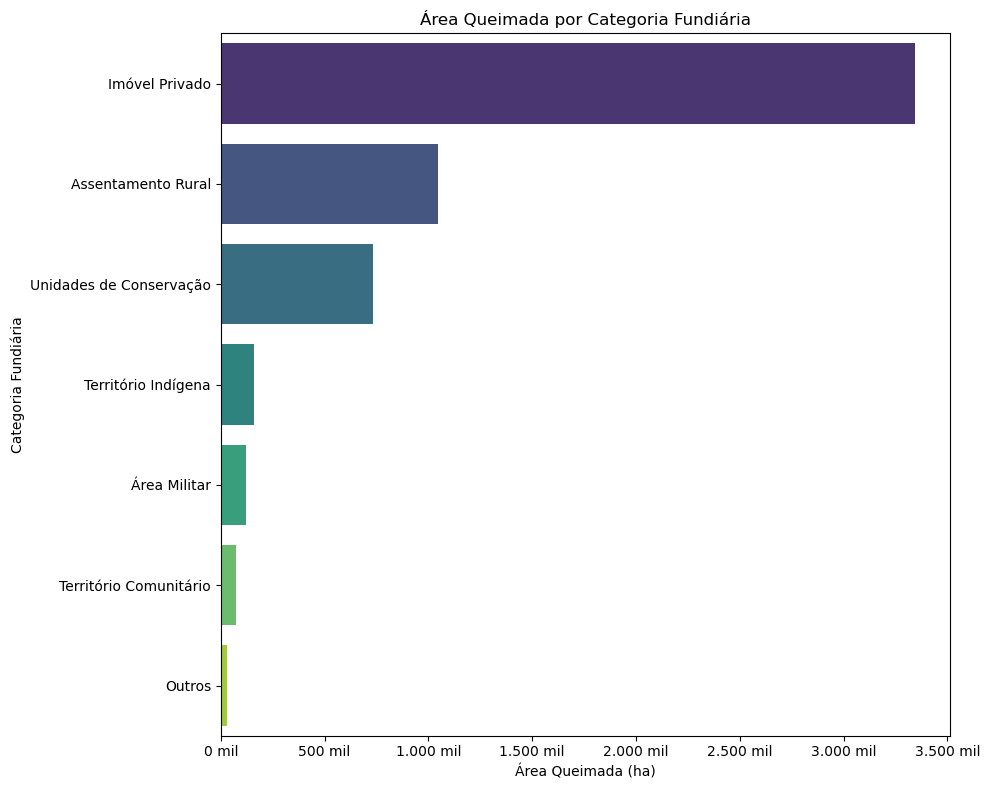

In [69]:
# Agregar os dados por 'territory', somando 'area_fire_ha'
territory_fire_sum = df.groupby('territory')['area_fire_ha'].sum().reset_index()

# Ordenar os valores para uma melhor visualização
territory_fire_sum = territory_fire_sum.sort_values('area_fire_ha', ascending=False)

# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 8))  # Ajustar o tamanho conforme necessário
sns.barplot(x='area_fire_ha', y='territory', data=territory_fire_sum, palette='viridis')

# Formatar o eixo X para usar 'mil' em vez de notação científica
# Função para formatar o eixo X
def thousands(x, pos):
    """O argumento 'pos' é a posição e não é usado aqui."""
    return '{:,.0f} mil'.format(x * 1e-3).replace(',', '.')

formatter = FuncFormatter(thousands)
plt.gca().xaxis.set_major_formatter(formatter)

# Adicionar títulos e rótulos
plt.title('Área Queimada por Categoria Fundiária')
plt.xlabel('Área Queimada (ha)')
plt.ylabel('Categoria Fundiária')

# Mostrar o gráfico
plt.tight_layout()
plt.show()